In [451]:
import math
import random
import time

import sklearn.metrics
from numpy import arange, c_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from scipy import optimize

import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve

import matplotlib.pyplot as plt

import pandas as pd



noise = 16
samples = 2425
seed = 244825
classes = 2
train_split = 0.8
test_split = 0.2
repeats = 100

In [452]:
def my_normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

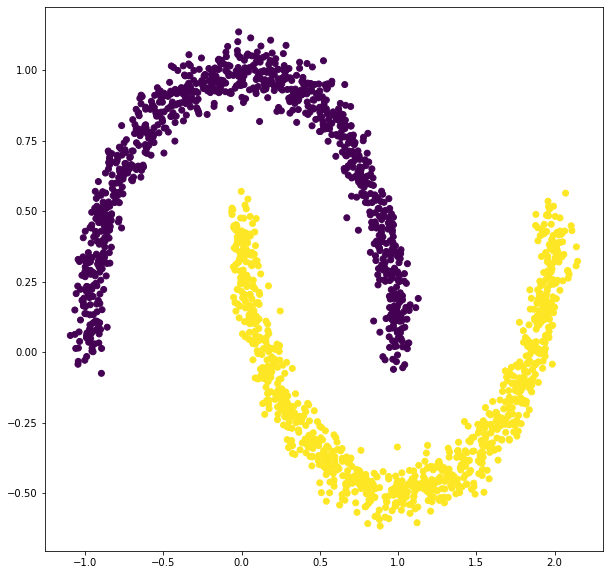

In [453]:
# X, y = datasets.make_classification(n_features=2, random_state=seed, n_redundant=0, n_samples=samples, n_classes=2, n_clusters_per_class=1)
X, y = datasets.make_moons(random_state=seed, n_samples=samples, noise=0.05)
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)

xx, yy = np.meshgrid(np.arange(X.min(), X.max(), 0.01),
                       np.arange(X.min(), X.max(), 0.01))

# X_train = my_normalize(X_train)
# X_test = my_normalize(X_test)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [454]:
# X, y = datasets.make_classification(n_features=2, random_state=seed, n_redundant=0, n_samples=samples, n_classes=2, n_clusters_per_class=1)
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)
#
# xx, yy = np.meshgrid(np.arange(-3.25, 4.25, 0.01),
#                        np.arange(-0.25, 2.25, 0.01))
#
# # X_train = my_normalize(X_train)
# # X_test = my_normalize(X_test)
#
#
# plt.figure(figsize=(10,10))
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [455]:
model = LogisticRegression()

time_sk = time.perf_counter()
model.fit(X_train, y_train.flatten())
time_sk = time.perf_counter() - time_sk
predict = model.predict(X_test)

confusion_matrix(y_test, predict)

array([[244,   0],
       [  0, 241]], dtype=int64)

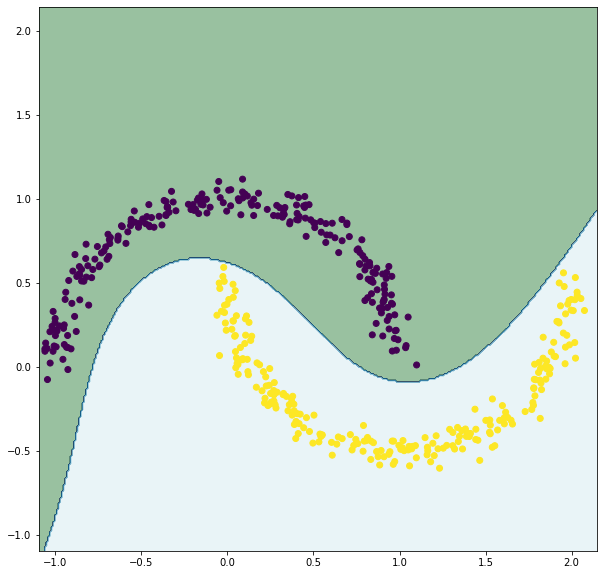

In [456]:
mesh_data = c_[xx.ravel(), yy.ravel()]
mesh_data = poly.fit_transform(mesh_data)

predict = model.predict(mesh_data)
predict = predict.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

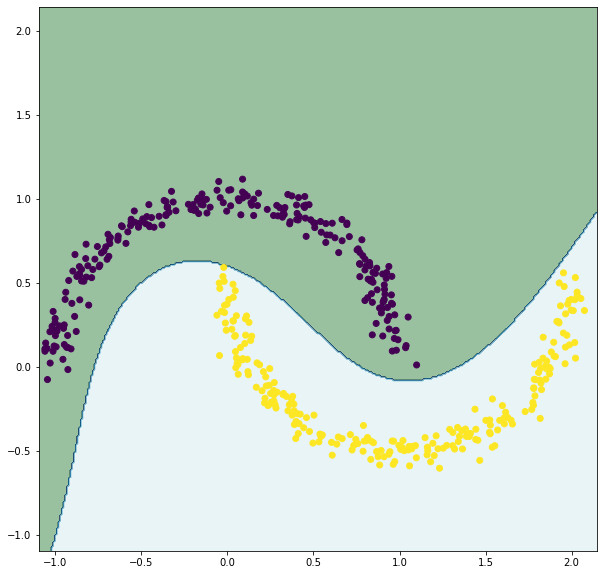

In [457]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


y_train = y_train.reshape(len(y_train), 1)

X_new = np.c_[np.ones([len(X_train), 1]), X_train]

theta = np.ones([X_new.shape[1], 1])


step = 0.01

time_my = time.perf_counter()

for i in range(100):
    s = X_new @ theta
    X_t_delta = sigmoid(s)
    delta_theta = (-step * ((X_t_delta - y_train) * (1 - X_t_delta) * X_t_delta).T @ X_new).T
    theta += delta_theta

time_my = time.perf_counter() - time_my

zzz = np.c_[xx.flatten(), yy.flatten()]
zzz = poly.fit_transform(zzz)
zzz = np.c_[np.ones([len(xx.flatten()), 1]), zzz]

predict1 = sigmoid(zzz @ theta)
predict1 = [1 if x >= 0.5 else 0 for x in predict1]
predict1 = np.asarray(predict1).reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict1, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [458]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))


X_new_test = np.c_[np.ones([len(X_test), 1]), X_test]
prediction = sigmoid(X_new_test @ theta)
prediction = [1 if x >= 0.5 else 0 for x in prediction]

print(theta)
print(model.intercept_, model.coef_)

[[ 2.64352787]
 [-1.96402444]
 [-3.20299596]
 [-4.44309552]
 [-1.06947107]
 [-0.94522046]
 [ 3.30699884]
 [-1.30250378]
 [ 1.18975344]
 [-1.77011445]]
[4.17495479] [[-3.19314715 -4.71005149 -6.90207616 -1.37490467 -1.20675725  5.1732703
  -2.30249732  2.17701361 -3.26812769]]


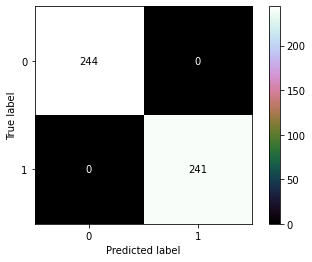

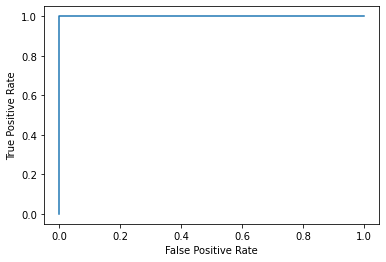

In [459]:
cm_model = confusion_matrix(y_test, model.predict(X_test))
tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot()

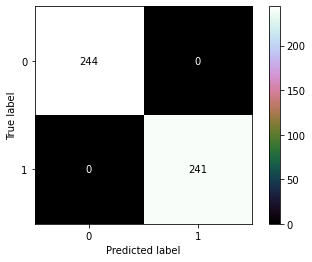

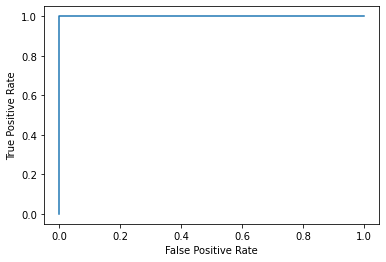

In [460]:
cm_model = confusion_matrix(y_test, prediction)
tn_my = cm_model[0][0]
fn_my = cm_model[0][1]
tp_my = cm_model[1][1]
fp_my = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

X_new_test = np.c_[np.ones([len(X_test), 1]), X_test]

fpr, tpr, roc_auc = roc_curve(y_test, sigmoid(X_new_test @ theta))

rok_analitic = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_analitic.plot()

In [461]:
print("Czas wykonania moj:", time_my)
print("Czas wykonania sklearn:", time_sk)

print("Czulosc moj:", tp_my/(tp_my + fn_my))
print("Czulosc sklearn:", tp_model/(tp_model + fn_model))

print("Swoistosc moj:", tn_my/(tn_my + fp_my))
print("Swoistosc sklearn:", tn_model/(tn_model + fp_model))

print("Accuracy moj", (tp_my + tn_my) / (tp_my + tn_my + fp_my + fn_my))
print("Accuracy sklearn", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

Czas wykonania moj: 0.0043194000027142465
Czas wykonania sklearn: 0.01066319999517873
Czulosc moj: 1.0
Czulosc sklearn: 1.0
Swoistosc moj: 1.0
Swoistosc sklearn: 1.0
Accuracy moj 1.0
Accuracy sklearn 1.0


# Cz. 2

In [462]:
australia = pd.read_csv('weatherAUS.csv')
print(len(australia.columns))
threshhold = math.floor(len(australia) * 0.7)

australia.loc[australia['RainToday'] == 'Yes', 'RainToday'] = 1.0
australia.loc[australia['RainToday'] == 'No', 'RainToday'] = 0.0

australia.loc[australia['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1.0
australia.loc[australia['RainTomorrow'] == 'No', 'RainTomorrow'] = 0.0

australia

23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [463]:
australia.dropna(axis=1, thresh=threshhold, inplace=True)
australia.dropna(axis=0, subset='RainTomorrow', inplace=True)
# australia['RainToday'].apply()

# australia = australia[australia['RainToday'] != 'SE']
print(len(australia.columns))
australia['RainToday'].value_counts()

19


0.0    109332
1.0     31455
Name: RainToday, dtype: int64

In [464]:
y_australia = australia['RainTomorrow']
australia.drop(columns='RainTomorrow')

australia.fillna(
    {
        'Location': australia['Location'].mode().values[0],
        'MinTemp': australia['MinTemp'].median(),
        'MaxTemp': australia['MaxTemp'].median(),
        'Rainfall': australia['Rainfall'].median(),
        'WindGustDir': australia['WindGustDir'].mode().values[0],
        'WindGustSpeed': australia['WindGustSpeed'].median(),
        'WindDir9am': australia['WindDir9am'].mode().values[0],
        'WindDir3pm': australia['WindDir3pm'].mode().values[0],
        'WindSpeed9am': australia['WindSpeed9am'].median(),
        'WindSpeed3pm': australia['WindSpeed3pm'].median(),
        'Humidity3pm': australia['Humidity3pm'].median(),
        'Humidity9am': australia['Humidity9am'].median(),
        'Pressure3pm': australia['Pressure3pm'].median(),
        'Pressure9am': australia['Pressure9am'].median(),
        'Temp3pm': australia['Temp3pm'].median(),
        'Temp9am': australia['Temp9am'].median(),
        'RainToday': australia['RainToday'].mode().values[0],

    },
    inplace=True
)
australia.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall              371.0
WindGustDir             WSW
WindGustSpeed         135.0
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am          130.0
WindSpeed3pm           87.0
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am          1041.0
Pressure3pm          1039.6
Temp9am                40.2
Temp3pm                46.7
RainToday               1.0
RainTomorrow            1.0
dtype: object

In [465]:
from scipy.stats.mstats import winsorize


def clip_series(s, lower, upper):
    clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper), axis=0)
    return clipped

columns_to_winsorize = ['MinTemp',
                        'MaxTemp',
                        'Rainfall',
                        'WindGustSpeed',
                        'WindSpeed9am',
                        'WindSpeed3pm',
                        'Humidity9am',
                        'Humidity3pm',
                        'Pressure3pm',
                        'Pressure9am',
                        'Temp9am',
                        'Temp3pm']
# for y in columns_to_winsorize:
#     australia[y] = clip_series(australia[y], 0.1, 0.9)

for i in columns_to_winsorize:
    q1 = australia[i].quantile(0.25)
    q3 = australia[i].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    australia.loc[australia[i] < lower_bound, i] = lower_bound
    australia.loc[australia[i] > upper_bound, i] = upper_bound

print(australia.max())

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype == 'float64' or df[feature_name].dtype == 'int32':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

australia = normalize(australia)

print(australia.max())

Date             2017-06-25
Location            Woomera
MinTemp                30.6
MaxTemp               43.65
Rainfall                1.5
WindGustDir             WSW
WindGustSpeed          68.5
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am           37.0
WindSpeed3pm           40.5
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am         1034.25
Pressure3pm          1032.0
Temp9am                35.3
Temp3pm                40.7
RainToday               1.0
RainTomorrow            1.0
dtype: object
Date             2017-06-25
Location            Woomera
MinTemp                 1.0
MaxTemp                 1.0
Rainfall                1.0
WindGustDir             WSW
WindGustSpeed           1.0
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am            1.0
WindSpeed3pm            1.0
Humidity9am             1.0
Humidity3pm             1.0
Pressure9am             1.0
Pressure3pm             1.0
Temp9am                 1.0
Temp3p

In [466]:
australia['Date'] = pd.to_datetime(australia['Date'])

australia['Year']= australia['Date'].dt.year
australia['Month']= australia['Date'].dt.month
australia['Day']= australia['Date'].dt.day
australia.dropna(subset='Date', inplace=True)
# australia.drop(columns=['Date', 'Year'], inplace=True)
australia.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [467]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder(sparse=False, handle_unknown='error')
minmax = MinMaxScaler()

columns_to_onehot = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Day', 'Month']

encoder_df = pd.DataFrame(encoder.fit_transform(australia[columns_to_onehot]))
minmax_df = pd.DataFrame(minmax.fit_transform(australia[columns_to_winsorize]))

encoder_df.columns = encoder.get_feature_names_out()
minmax_df.columns = minmax.get_feature_names_out()

new_australia = encoder_df.join(australia)
new_australia.drop(columns=['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Day', 'Month', 'Year'], inplace=True)

print(len(new_australia))
print(new_australia.isna().sum())

############
############ 3190 wartosci pojawia sie NaN, czemu?
############
new_australia.dropna(inplace=True)
print(new_australia.isna().sum())
new_australia

142193
WindGustDir_E         0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
                   ... 
Pressure3pm        3190
Temp9am            3190
Temp3pm            3190
RainToday          3190
RainTomorrow       3190
Length: 107, dtype: int64
WindGustDir_E      0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
                  ..
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Length: 107, dtype: int64


,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.540541,0.592593,0.646341,0.22,0.200301,0.258929,0.500000,0.507812,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108108,0.543210,0.317073,0.25,0.287651,0.279762,0.508152,0.572917,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.513514,0.641975,0.243902,0.30,0.197289,0.306548,0.611413,0.544271,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.297297,0.222222,0.329268,0.16,0.498494,0.428571,0.532609,0.630208,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.189189,0.493827,0.780488,0.33,0.293675,0.226190,0.524457,0.713542,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.297297,0.148148,0.707317,0.49,0.197289,0.187500,0.858696,0.817708,0.0,0.0
142189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.189189,0.172840,0.634146,0.64,0.149096,0.113095,0.866848,0.781250,0.0,1.0
142190,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.243243,0.148148,0.695122,0.62,0.149096,0.092262,0.796196,0.760417,1.0,1.0
142191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.837838,0.592593,0.951220,0.86,0.049699,0.053571,0.714674,0.666667,1.0,1.0


In [468]:
provinces = new_australia.groupby('Location')
dataframes = [group for _, group in provinces]
dataframes_dict = dict()

for frm in dataframes:
    dataframes_dict[frm['Location'].unique()[0]] = frm
# dataframes[20]['Location'].unique()[0]
smallest = len(min(dataframes, key=lambda x: len(x)))
dataframes2 = list()
for frame in dataframes:
    dataframes2.append(frame.sample(n=smallest, random_state=seed))

Adelaide records: 3090
Czulosc: 0.780952380952381
Swoistosc: 0.8596491228070176
Accuracy: 0.8462783171521036
ROC auc: 0.7414492834751455
F1 score: 0.6332046332046332
BA score: 0.7414492834751456


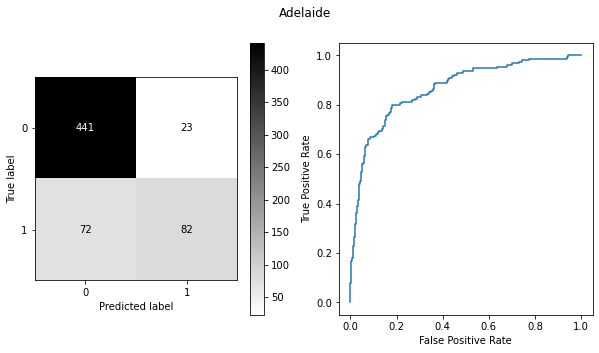

Albany records: 3016
Czulosc: 0.7096774193548387
Swoistosc: 0.7895833333333333
Accuracy: 0.7731788079470199
ROC auc: 0.6894307388283292
F1 score: 0.562300319488818
BA score: 0.6894307388283292


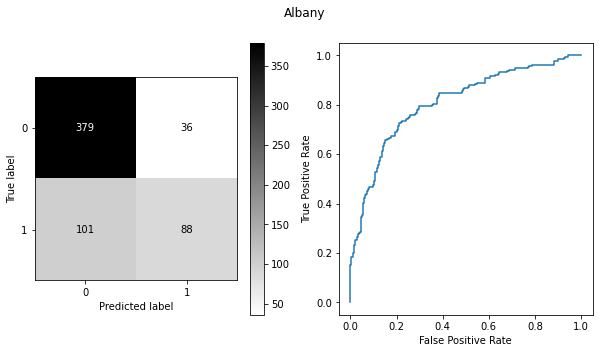

Albury records: 3011
Czulosc: 0.6901408450704225
Swoistosc: 0.8928571428571429
Accuracy: 0.8689883913764511
ROC auc: 0.708999278691014
F1 score: 0.5536723163841808
BA score: 0.708999278691014


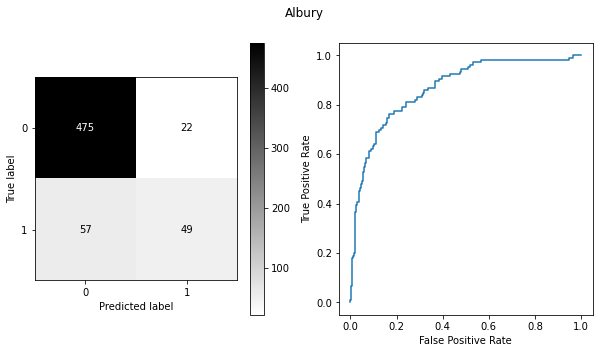

AliceSprings records: 3031
Czulosc: 0.65
Swoistosc: 0.9335604770017035
Accuracy: 0.9242174629324547
ROC auc: 0.6186936936936938
F1 score: 0.3611111111111111
BA score: 0.6186936936936938


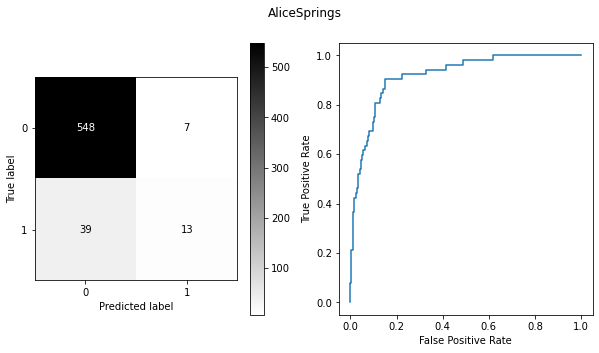

BadgerysCreek records: 2928
Czulosc: 0.6805555555555556
Swoistosc: 0.896887159533074
Accuracy: 0.8703071672354948
ROC auc: 0.7164357478528602
F1 score: 0.5632183908045977
BA score: 0.7164357478528601


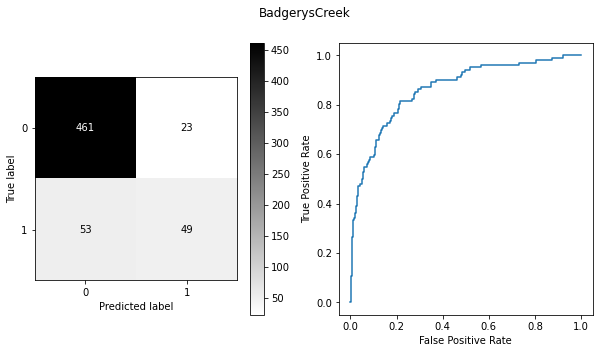

Ballarat records: 3028
Czulosc: 0.6967213114754098
Swoistosc: 0.8760330578512396
Accuracy: 0.8399339933993399
ROC auc: 0.7529732964320444
F1 score: 0.6367041198501873
BA score: 0.7529732964320442


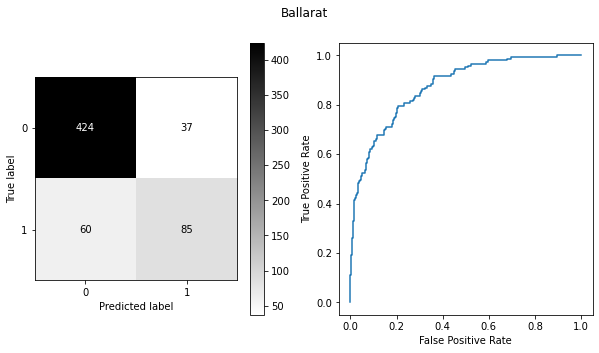

Bendigo records: 3034
Czulosc: 0.7205882352941176
Swoistosc: 0.9035250463821892
Accuracy: 0.8830313014827018
ROC auc: 0.7237995538684303
F1 score: 0.5798816568047336
BA score: 0.7237995538684303


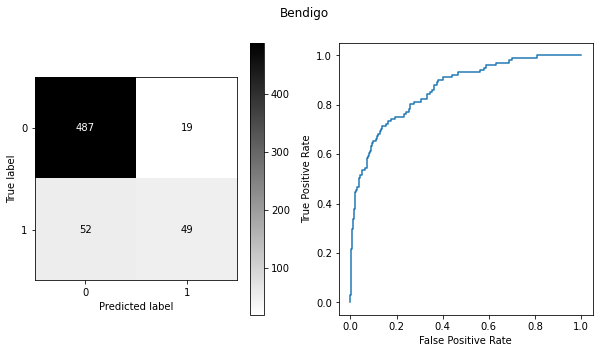

Brisbane records: 3161
Czulosc: 0.7252747252747253
Swoistosc: 0.8911439114391144
Accuracy: 0.8672985781990521
ROC auc: 0.7393937007874015
F1 score: 0.611111111111111
BA score: 0.7393937007874016


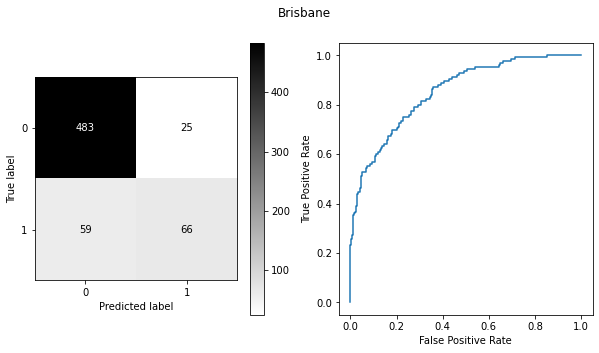

Cairns records: 2988
Czulosc: 0.7055214723926381
Swoistosc: 0.8229885057471265
Accuracy: 0.7909698996655519
ROC auc: 0.7403658661740559
F1 score: 0.647887323943662
BA score: 0.7403658661740559


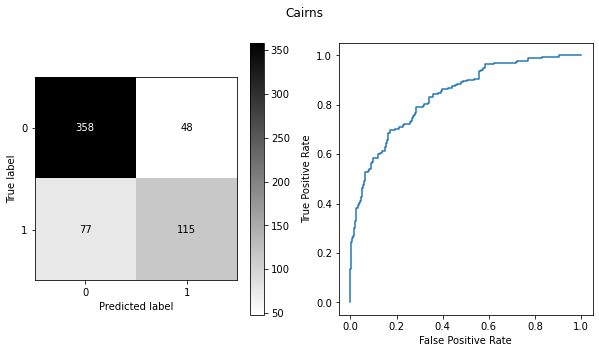

Canberra records: 3418
Czulosc: 0.7857142857142857
Swoistosc: 0.8876221498371335
Accuracy: 0.8771929824561403
ROC auc: 0.70838133640553
F1 score: 0.5670103092783505
BA score: 0.7083813364055299


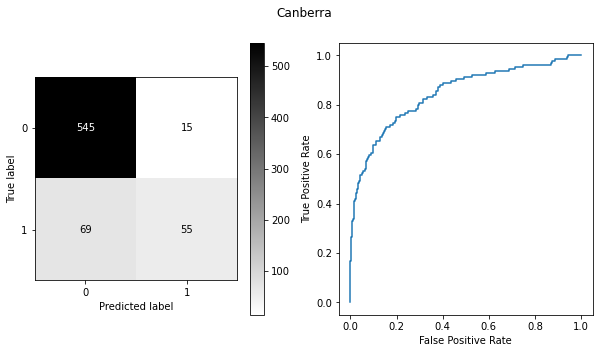

Cobar records: 2988
Czulosc: 0.6410256410256411
Swoistosc: 0.9087656529516994
Accuracy: 0.8913043478260869
ROC auc: 0.6510637225247026
F1 score: 0.43478260869565216
BA score: 0.6510637225247026


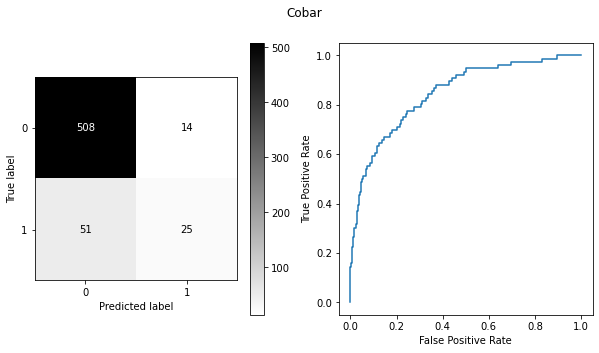

CoffsHarbour records: 2953
Czulosc: 0.7795275590551181
Swoistosc: 0.8168103448275862
Accuracy: 0.8087986463620981
ROC auc: 0.7346237047324005
F1 score: 0.6366559485530546
BA score: 0.7346237047324004


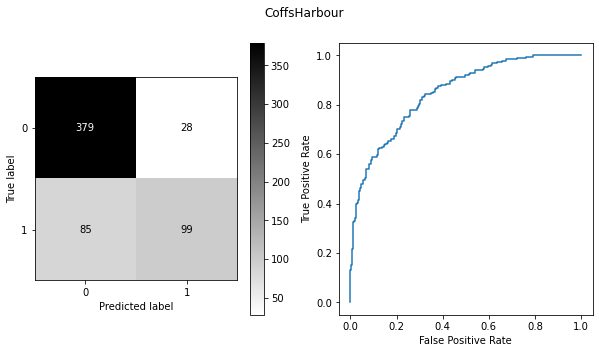

Dartmoor records: 2943
Czulosc: 0.7236842105263158
Swoistosc: 0.8581235697940504
Accuracy: 0.8234295415959253
ROC auc: 0.7694077296302493
F1 score: 0.6790123456790124
BA score: 0.7694077296302493


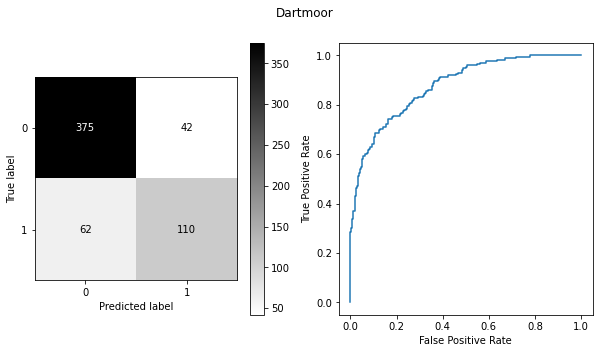

Darwin records: 3082
Czulosc: 0.7651006711409396
Swoistosc: 0.8760683760683761
Accuracy: 0.8492706645056726
ROC auc: 0.79206950614058
F1 score: 0.7102803738317757
BA score: 0.79206950614058


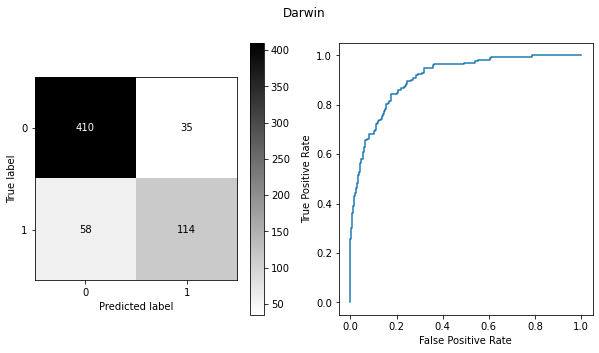

GoldCoast records: 2980
Czulosc: 0.6491228070175439
Swoistosc: 0.8526970954356846
Accuracy: 0.8137583892617449
ROC auc: 0.7108265157886688
F1 score: 0.5714285714285715
BA score: 0.7108265157886688


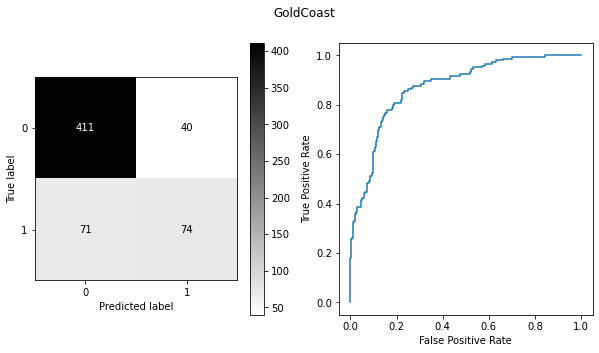

Hobart records: 3188
Czulosc: 0.6274509803921569
Swoistosc: 0.8022388059701493
Accuracy: 0.774294670846395
ROC auc: 0.6476370035193564
F1 score: 0.47058823529411764
BA score: 0.6476370035193564


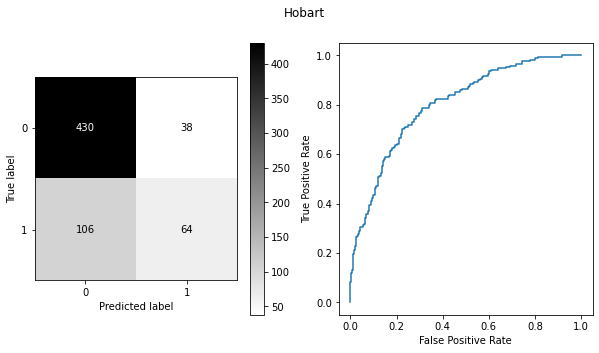

Launceston records: 3028
Czulosc: 0.7272727272727273
Swoistosc: 0.8608870967741935
Accuracy: 0.8366336633663366
ROC auc: 0.7356336187273288
F1 score: 0.6177606177606179
BA score: 0.7356336187273288


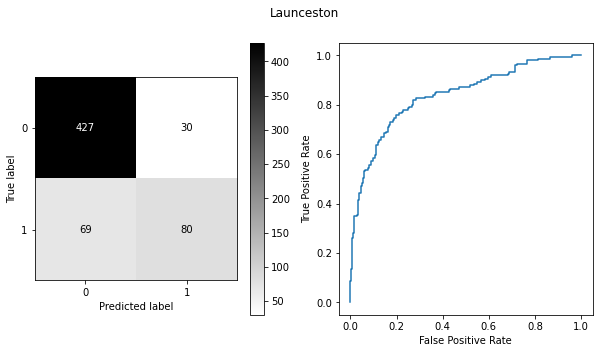

Melbourne records: 2435
Czulosc: 0.7411764705882353
Swoistosc: 0.8208955223880597
Accuracy: 0.8069815195071869
ROC auc: 0.7020833333333333
F1 score: 0.5727272727272726
BA score: 0.7020833333333334


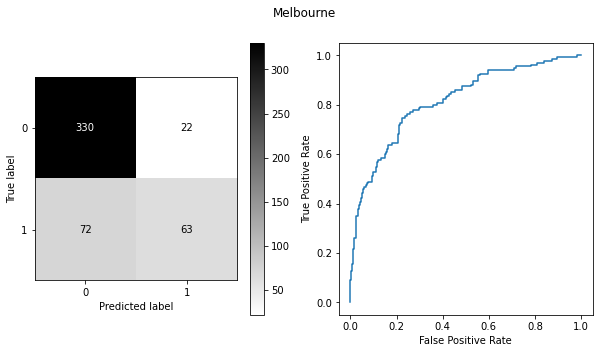

MelbourneAirport records: 3009
Czulosc: 0.6385542168674698
Swoistosc: 0.8516377649325626
Accuracy: 0.8222591362126246
ROC auc: 0.6720664928292046
F1 score: 0.49765258215962443
BA score: 0.6720664928292046


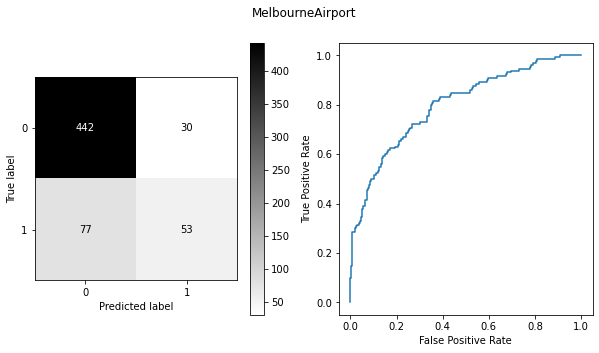

Mildura records: 3007
Czulosc: 0.7
Swoistosc: 0.9265734265734266
Accuracy: 0.915282392026578
ROC auc: 0.6583178726035869
F1 score: 0.45161290322580644
BA score: 0.6583178726035869


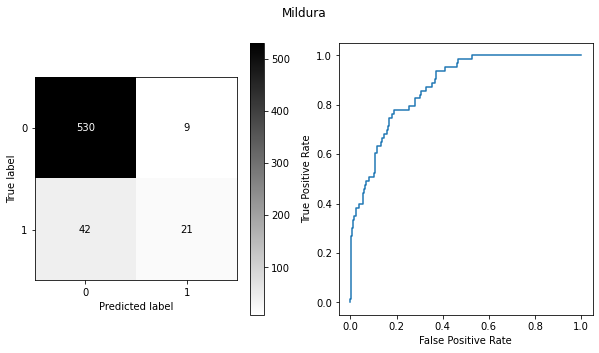

Moree records: 2854
Czulosc: 0.6590909090909091
Swoistosc: 0.9146110056925996
Accuracy: 0.8949211908931699
ROC auc: 0.6808554026863887
F1 score: 0.49152542372881364
BA score: 0.6808554026863887


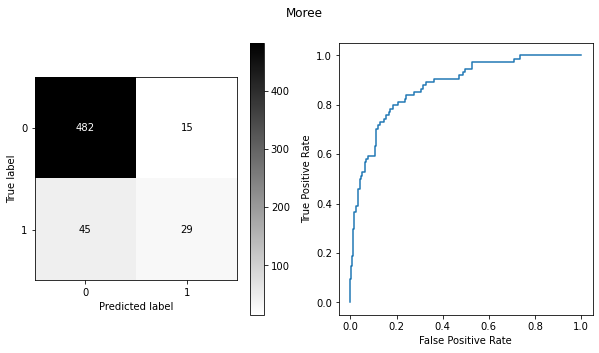

MountGambier records: 3030
Czulosc: 0.7579617834394905
Swoistosc: 0.8285077951002228
Accuracy: 0.8102310231023102
ROC auc: 0.7572299651567945
F1 score: 0.6742209631728044
BA score: 0.7572299651567944


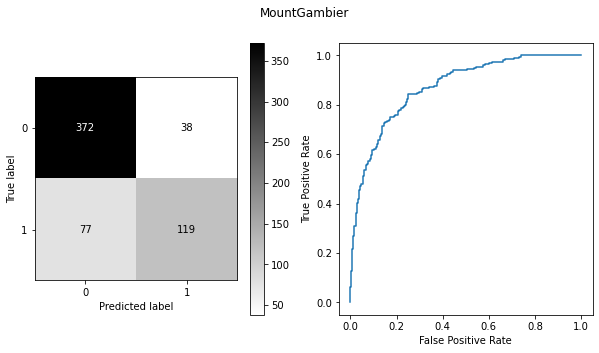

MountGinini records: 2907
Czulosc: 0.6551724137931034
Swoistosc: 0.8068669527896996
Accuracy: 0.7766323024054983
ROC auc: 0.6808387395736792
F1 score: 0.5390070921985816
BA score: 0.6808387395736794


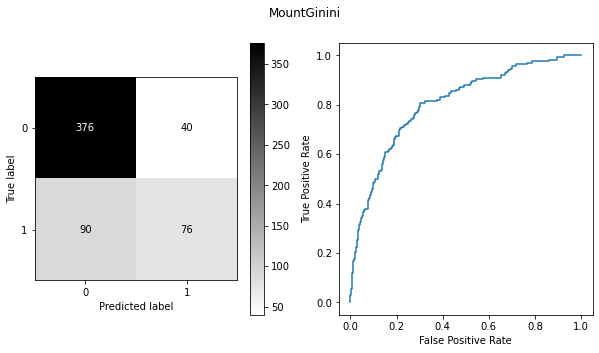

Newcastle records: 2955
Czulosc: 0.5942028985507246
Swoistosc: 0.8045977011494253
Accuracy: 0.7800338409475466
ROC auc: 0.6121066433566433
F1 score: 0.3867924528301887
BA score: 0.6121066433566433


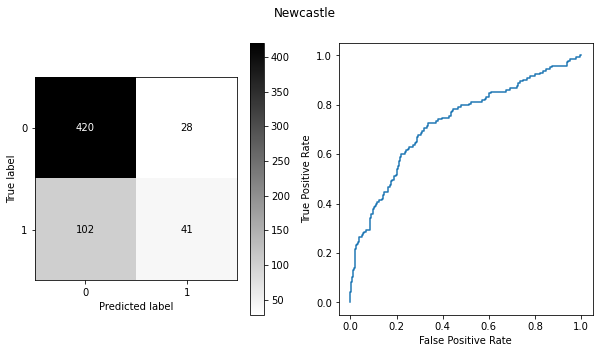

Nhil records: 1569
Czulosc: 0.5588235294117647
Swoistosc: 0.9107142857142857
Accuracy: 0.8726114649681529
ROC auc: 0.6881313131313131
F1 score: 0.48717948717948717
BA score: 0.6881313131313131


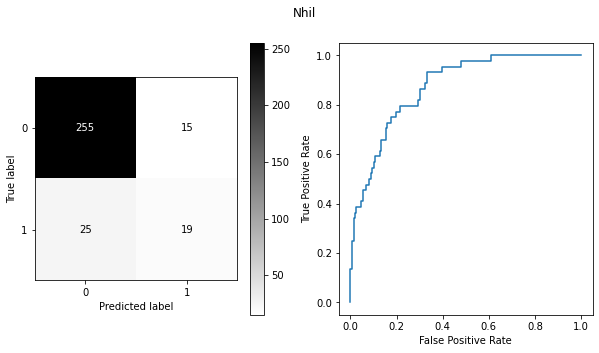

NorahHead records: 2929
Czulosc: 0.7522123893805309
Swoistosc: 0.8393234672304439
Accuracy: 0.8225255972696246
ROC auc: 0.7310339788089149
F1 score: 0.6204379562043795
BA score: 0.7310339788089149


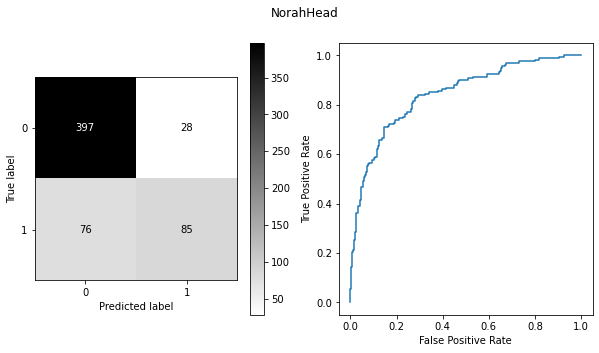

NorfolkIsland records: 2964
Czulosc: 0.7288135593220338
Swoistosc: 0.791578947368421
Accuracy: 0.7790893760539629
ROC auc: 0.6932167461579227
F1 score: 0.5676567656765676
BA score: 0.6932167461579226


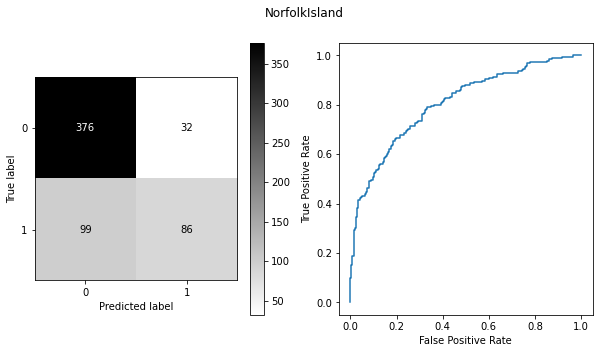

Nuriootpa records: 3002
Czulosc: 0.782608695652174
Swoistosc: 0.9076620825147348
Accuracy: 0.8885191347753744
ROC auc: 0.7817741204365564
F1 score: 0.6824644549763034
BA score: 0.7817741204365564


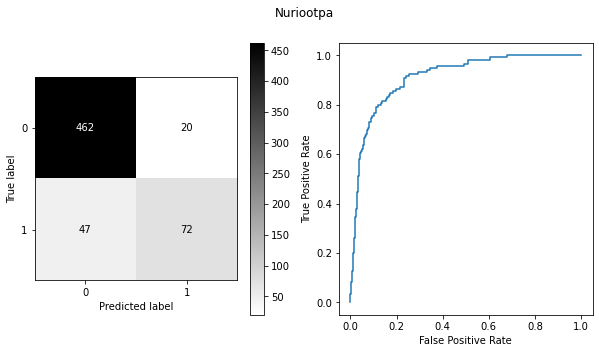

PearceRAAF records: 2762
Czulosc: 0.7878787878787878
Swoistosc: 0.8973305954825462
Accuracy: 0.8842676311030742
ROC auc: 0.7393808964827616
F1 score: 0.6190476190476191
BA score: 0.7393808964827616


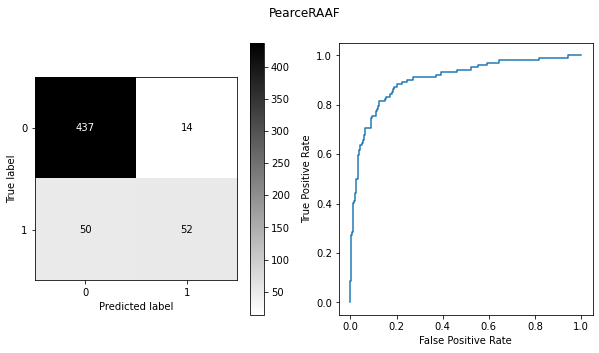

Penrith records: 2964
Czulosc: 0.7816091954022989
Swoistosc: 0.8656126482213439
Accuracy: 0.8532883642495784
ROC auc: 0.7292122538293216
F1 score: 0.609865470852018
BA score: 0.7292122538293216


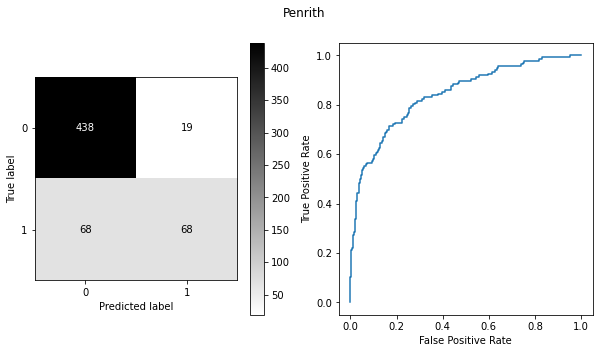

Perth records: 3193
Czulosc: 0.7640449438202247
Swoistosc: 0.8945454545454545
Accuracy: 0.8763693270735524
ROC auc: 0.7493734335839597
F1 score: 0.6325581395348837
BA score: 0.7493734335839599


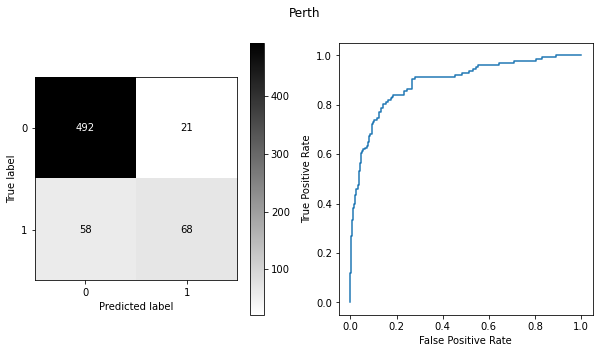

PerthAirport records: 3009
Czulosc: 0.8072289156626506
Swoistosc: 0.8998073217726397
Accuracy: 0.8870431893687708
ROC auc: 0.7649494580440872
F1 score: 0.6633663366336634
BA score: 0.7649494580440872


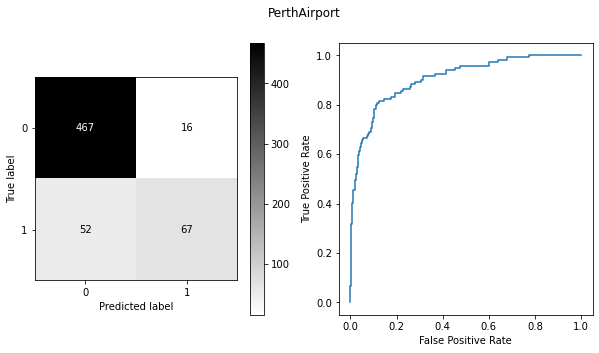

Portland records: 2996
Czulosc: 0.7405405405405405
Swoistosc: 0.7734939759036145
Accuracy: 0.7633333333333333
ROC auc: 0.7314961461302925
F1 score: 0.6586538461538461
BA score: 0.7314961461302925


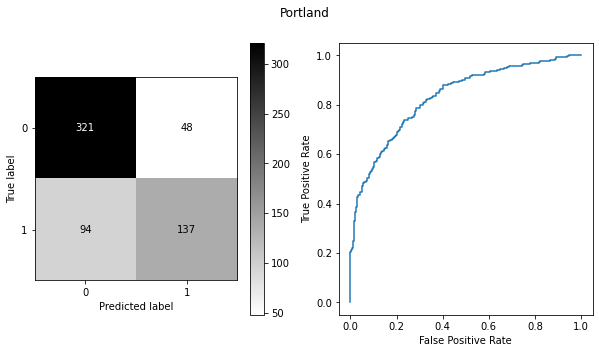

Richmond records: 2951
Czulosc: 0.7605633802816901
Swoistosc: 0.875
Accuracy: 0.8612521150592216
ROC auc: 0.7088822817262497
F1 score: 0.5684210526315789
BA score: 0.7088822817262498


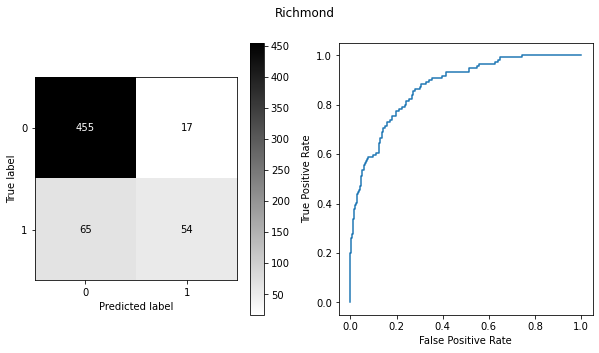

Sale records: 3000
Czulosc: 0.6575342465753424
Swoistosc: 0.8538899430740038
Accuracy: 0.83
ROC auc: 0.6656842105263158
F1 score: 0.4848484848484849
BA score: 0.6656842105263158


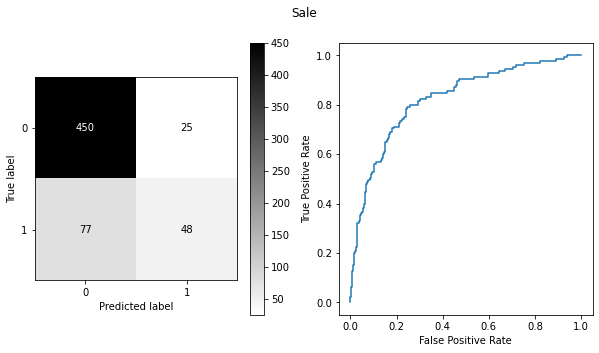

SalmonGums records: 2955
Czulosc: 0.6944444444444444
Swoistosc: 0.8990990990990991
Accuracy: 0.8866328257191202
ROC auc: 0.6435366739288307
F1 score: 0.42735042735042733
BA score: 0.6435366739288307


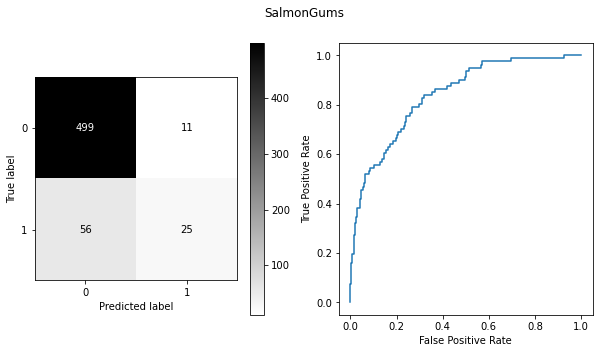

Sydney records: 3337
Czulosc: 0.7280701754385965
Swoistosc: 0.851985559566787
Accuracy: 0.8308383233532934
ROC auc: 0.7207000421712151
F1 score: 0.5949820788530467
BA score: 0.7207000421712151


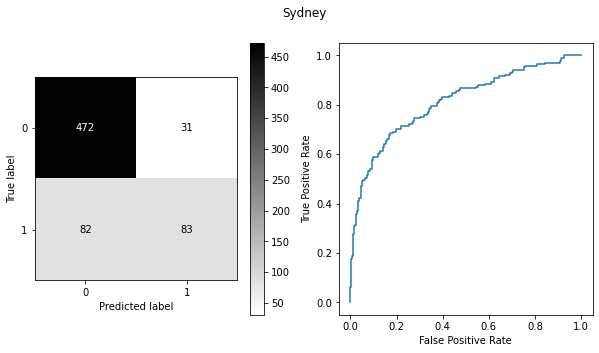

SydneyAirport records: 3005
Czulosc: 0.6936936936936937
Swoistosc: 0.8448979591836735
Accuracy: 0.8169717138103162
ROC auc: 0.7136875583566761
F1 score: 0.5833333333333334
BA score: 0.713687558356676


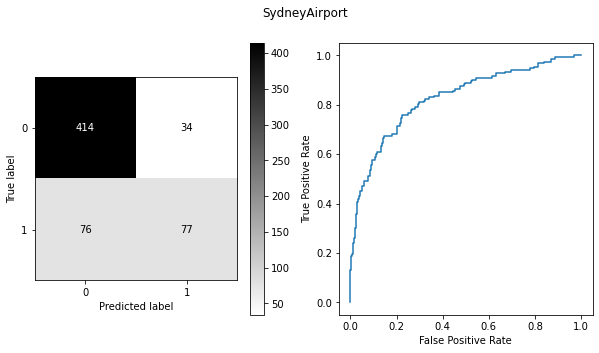

Townsville records: 3033
Czulosc: 0.6578947368421053
Swoistosc: 0.9171374764595104
Accuracy: 0.8846787479406919
ROC auc: 0.7406163162042222
F1 score: 0.5882352941176471
BA score: 0.7406163162042221


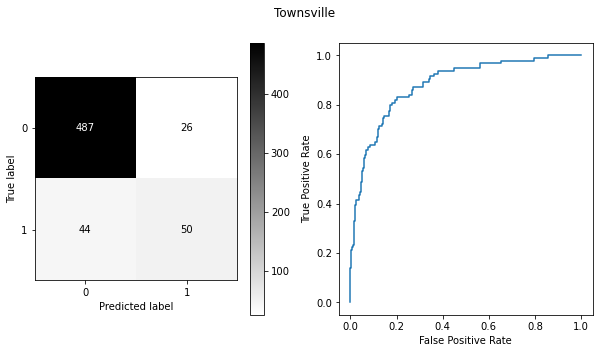

Tuggeranong records: 2998
Czulosc: 0.684931506849315
Swoistosc: 0.8766603415559773
Accuracy: 0.8533333333333334
ROC auc: 0.6936799641416405
F1 score: 0.5319148936170213
BA score: 0.6936799641416405


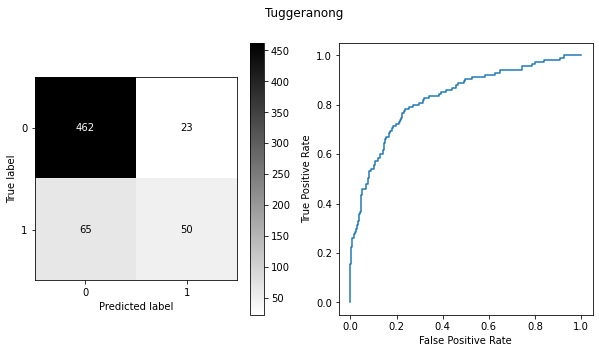

WaggaWagga records: 2976
Czulosc: 0.7833333333333333
Swoistosc: 0.9197761194029851
Accuracy: 0.9060402684563759
ROC auc: 0.7482652613087395
F1 score: 0.6266666666666667
BA score: 0.7482652613087396


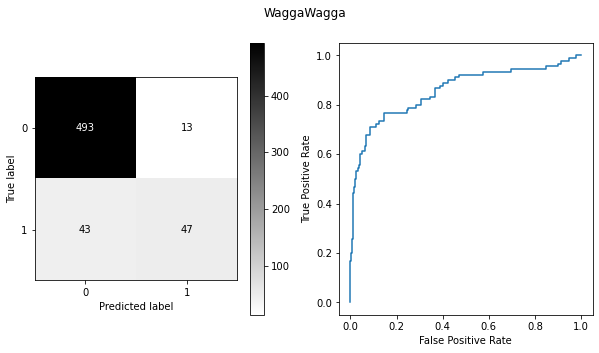

Walpole records: 2819
Czulosc: 0.7450980392156863
Swoistosc: 0.8734793187347932
Accuracy: 0.8386524822695035
ROC auc: 0.7943785191015318
F1 score: 0.7147335423197492
BA score: 0.7943785191015318


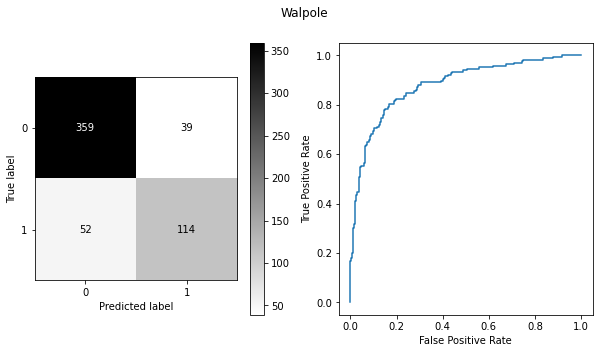

Watsonia records: 2999
Czulosc: 0.7204301075268817
Swoistosc: 0.8560157790927022
Accuracy: 0.835
ROC auc: 0.7110248447204969
F1 score: 0.5751072961373391
BA score: 0.7110248447204969


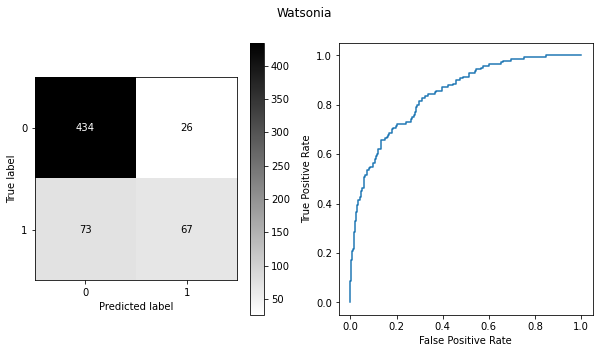

Williamtown records: 2553
Czulosc: 0.725
Swoistosc: 0.8074245939675174
Accuracy: 0.7945205479452054
ROC auc: 0.6759440291355184
F1 score: 0.5248868778280542
BA score: 0.6759440291355185


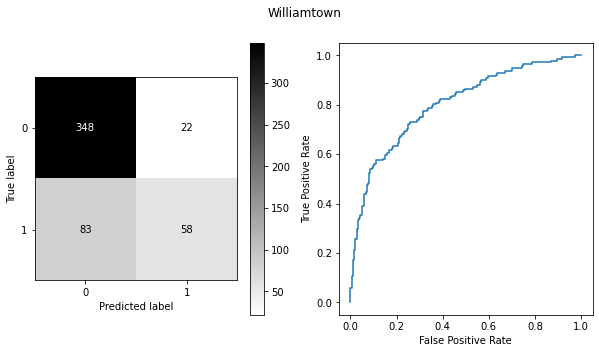

Witchcliffe records: 2952
Czulosc: 0.8206896551724138
Swoistosc: 0.874439461883408
Accuracy: 0.8612521150592216
ROC auc: 0.8087500000000001
F1 score: 0.74375
BA score: 0.8087500000000001


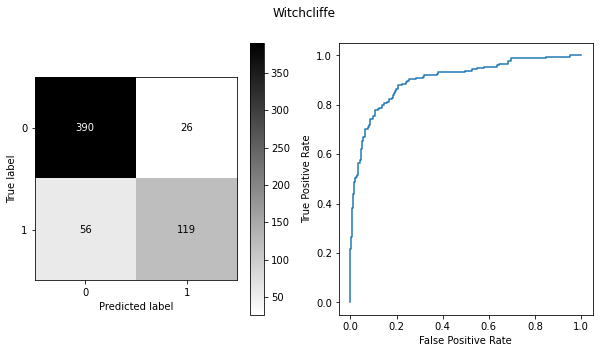

Wollongong records: 2983
Czulosc: 0.7241379310344828
Swoistosc: 0.8490196078431372
Accuracy: 0.830820770519263
ROC auc: 0.6987417943107221
F1 score: 0.5550660792951542
BA score: 0.6987417943107221


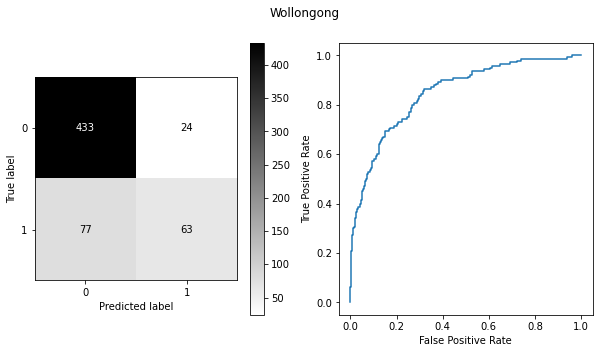

Woomera records: 2990
Czulosc: 0.7058823529411765
Swoistosc: 0.9518072289156626
Accuracy: 0.9448160535117057
ROC auc: 0.6455197132616487
F1 score: 0.42105263157894735
BA score: 0.6455197132616487


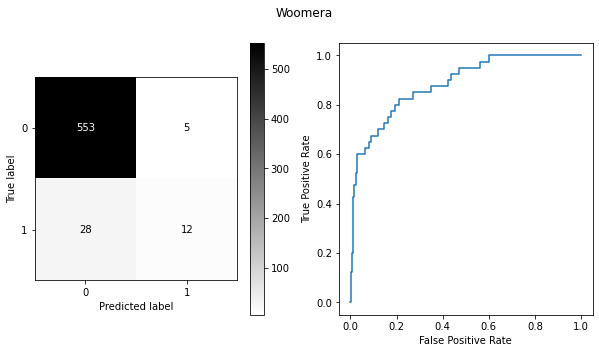

In [469]:
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score

models = dict()

for frame in dataframes:
    location = frame['Location'].unique()[0]
    print(location, "records:", len(frame))
    #print(location)
    new_frame = frame.drop(columns=['Location', 'Date'])
    y = frame['RainTomorrow']
    y = y.astype('int')
    X = new_frame.drop(columns=['RainTomorrow'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)

    model = LogisticRegression(max_iter=10000)

    model.fit(X_train, y_train)
    models[location] = model
    predict = model.predict(X_test)

    figure, axis = plt.subplots(1, 2, figsize=(10,5))
    figure.suptitle(location)

    cm_model = confusion_matrix(y_test, model.predict(X_test))

    tn_model = cm_model[0][0]
    fn_model = cm_model[0][1]
    tp_model = cm_model[1][1]
    fp_model = cm_model[1][0]

    print("Czulosc:", tp_model/(tp_model + fn_model))
    print("Swoistosc:", tn_model/(tn_model + fp_model))
    print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

    ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

    fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

    print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
    print("F1 score:", f1_score(y_test, model.predict(X_test)))
    print("BA score:", balanced_accuracy_score(y_test, model.predict(X_test)))

    rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
    rok_model.plot(ax=axis[1])
    plt.show()




Czulosc: 0.8193548387096774
Swoistosc: 0.8899082568807339
Accuracy: 0.871404399323181
ROC auc: 0.8292032967032967
F1 score: 0.7696969696969698
BA score: 0.8292032967032967


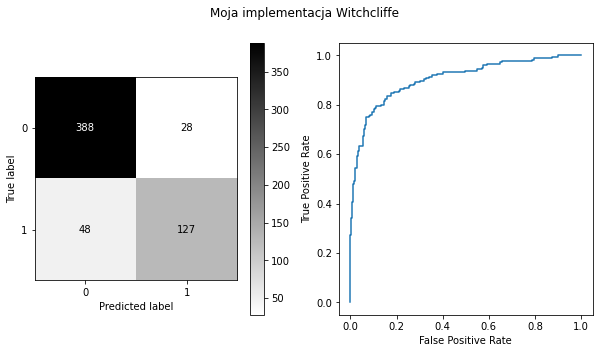

In [604]:


frame = dataframes_dict['Witchcliffe']

new_frame = frame.drop(columns=['Location', 'Date'])
y = frame['RainTomorrow']
y = y.astype('int')
X = new_frame.drop(columns=['RainTomorrow'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)



y_train = y_train.to_numpy().reshape(len(y_train), 1)

X_new = X_train

theta = np.ones([X_new.shape[1], 1])


step = 0.01


for i in range(10000):
    s = X_new @ theta
    X_t_delta = sigmoid(s)
    delta_theta = (-step * ((X_t_delta - y_train) * (1 - X_t_delta) * X_t_delta).T @ X_new).T
    theta += delta_theta

theta

zzzzz = X_test @ theta
prediction4 = sigmoid(zzzzz)
prediction3 = sigmoid(zzzzz)
prediction3.loc[prediction3[0] >= 0.5] = 1
prediction3.loc[prediction3[0] < 0.5] = 0

y_test = y_test.to_numpy().reshape(len(y_test), 1)

figure, axis = plt.subplots(1, 2, figsize=(10,5))
figure.suptitle("Moja implementacja Witchcliffe")

cm_model = confusion_matrix(y_test, prediction3)

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]

print("Czulosc:", tp_model/(tp_model + fn_model))
print("Swoistosc:", tn_model/(tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

fpr, tpr, roc_auc = roc_curve(y_test, prediction4)

print("ROC auc:", roc_auc_score(y_test, prediction3))
print("F1 score:", f1_score(y_test, prediction3))
print("BA score:", balanced_accuracy_score(y_test, prediction3))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot(ax=axis[1])
plt.show()

In [ ]:
y_australia = new_australia['RainTomorrow']
X_australia = new_australia.drop(columns=['Location', 'RainTomorrow', 'Date'])
y_australia = y_australia.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_australia, y_australia, train_size=train_split, test_size=test_split, random_state=seed)

for model in models.keys():
    print(model)
    location = model

    model = models[model]

    predict = model.predict(X_test)

    figure, axis = plt.subplots(1, 2, figsize=(10,5))
    figure.suptitle(location)

    cm_model = confusion_matrix(y_test, model.predict(X_test))

    tn_model = cm_model[0][0]
    fn_model = cm_model[0][1]
    tp_model = cm_model[1][1]
    fp_model = cm_model[1][0]

    print("Czulosc:", tp_model/(tp_model + fn_model))
    print("Swoistosc:", tn_model/(tn_model + fp_model))
    print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

    ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

    fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

    print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
    print("F1 score:", f1_score(y_test, model.predict(X_test)))

    rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
    rok_model.plot(ax=axis[1])
    plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier

y_australia = new_australia['RainTomorrow']
X_australia = new_australia.drop(columns=['Location', 'RainTomorrow'])
y_australia = y_australia.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_australia, y_australia, train_size=train_split, test_size=test_split, random_state=seed)

model = DummyClassifier(strategy='stratified', random_state=seed)
# model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

predict = model.predict(X_test)

figure, axis = plt.subplots(1, 2, figsize=(10,5))
figure.suptitle('Dummy')

cm_model = confusion_matrix(y_test, model.predict(X_test))

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]

print("Czulosc:", tp_model/(tp_model + fn_model))
print("Swoistosc:", tn_model/(tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

fpr, tpr, roc_auc = roc_curve(y_test, model.predict(X_test))

print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
print("F1 score:", f1_score(y_test, model.predict(X_test)))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot(ax=axis[1])
plt.show()